assignment:
    
    
https://github.com/Make-School-Courses/DS-2.1-Machine-Learning/blob/master/Assignments/Home_Work_Linear_Regression.ipynb

In [208]:
# 1- Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets)

# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn
import statsmodels.api as sm


boston = load_boston()

print(boston.data)
print(boston.data.shape)

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

print(bos.head())

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2 

In [49]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [23]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
# Backup file to a .csv

filename = "./data/boston_data"
bos.to_csv(filename, sep=',')

2- Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff!



In [35]:
bos.keys()
#.round(2)will limit decimals
bos.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


Lets graph some things

In [58]:
def scatter_two_features(independent_feature, dependent_feature="PRICE"):
    """ Plots a scatterplot of two features across our joint dataset. """
    plt.scatter(bos[independent_feature], bos[dependent_feature])
    plt.xlabel(independent_feature)
    plt.ylabel(dependent_feature)

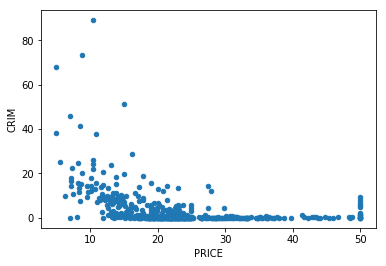

In [34]:
# Price to crime

bos.plot.scatter(x="PRICE", y="CRIM")

# Create an object that holds our trendline
# y_fit = m * X + b
y_fit = 

# Plot the object

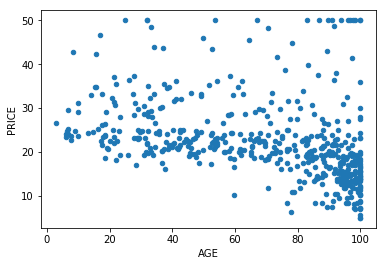

In [28]:
#Price to age

bos.plot.scatter(x="AGE", y="PRICE")

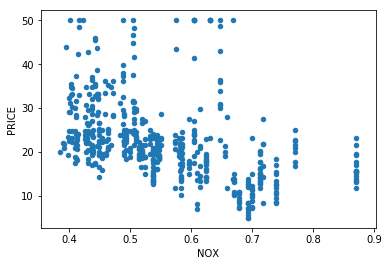

In [29]:
bos.plot.scatter(x="NOX", y="PRICE")

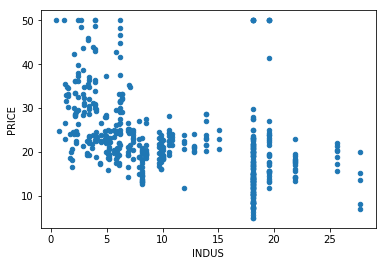

In [30]:
bos.plot.scatter(x="INDUS", y="PRICE")

In [36]:
bos.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

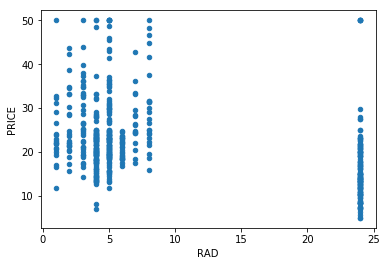

In [43]:
bos.plot.scatter(x="RAD", y="PRICE")

In [42]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

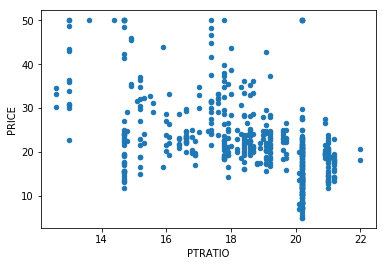

In [46]:
bos.plot.scatter(x="PTRATIO", y="PRICE")

3- Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)

In [55]:
bos.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [54]:
#this creates a corralation map for all features. 
bos.corr().round(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.0000,-0.2005,0.4066,-0.0559,0.4210,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556,-0.3883
ZN,-0.2005,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130,0.3604
INDUS,0.4066,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038,-0.4837
CHAS,-0.0559,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539,0.1753
NOX,0.4210,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909,-0.4273
RM,-0.2192,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138,0.6954
AGE,0.3527,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023,-0.3770
DIS,-0.3797,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970,0.2499
RAD,0.6255,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887,-0.3816
TAX,0.5828,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,-0.4418,0.5440,-0.4685


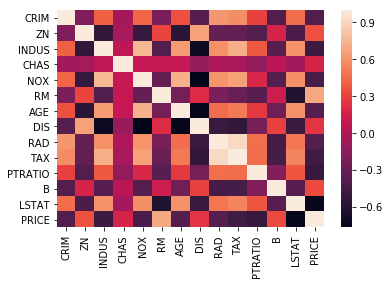

In [62]:
sns.heatmap(bos.corr())

In [63]:
def _value_to_category(value):
    """ Helper function to convert numerical values between -1.0 and 1.0 to discretized categories. """
    _categorical_types, _value_ranges_test = ["- (S)", "- (M)", "- (W)", "0", "+ (W)", "+ (M)", "+ (S)"], [-1.0, -0.7, -0.4, -0.1, 0.1, 0.4, 0.7, 1.0]
    # Iterates through value ranges and checks if value falls within specific range
    for index in range(len(_value_ranges_test) - 1):
        if float(value) >= _value_ranges_test[index] and float(value) < _value_ranges_test[index + 1]:
            return _categorical_types[index]

def corrplot_(df=None, mask_type="numerical", figsize=(14, 14), fontsize=8, cpalette=(10, 220)):
    """ Global function that produces customized correlation plot reducing redundancy. """    
    if df is None:
        raise ReferenceError("\nDataFrame not found.")
    corr_data = df.corr()

    # Creates whitespace mask over upper right triangle section for repeated features
    upper_triangle_mask = np.zeros_like(corr_data, dtype=np.bool)
    upper_triangle_mask[np.triu_indices_from(upper_triangle_mask)] = True
    
    # Generates MatPlotLib subplot objects
    fig, ax = plt.subplots(figsize=figsize)
    
    # Calculates relative maximum from correlational data
    vmax = np.abs(corr_data.values[~upper_triangle_mask]).max()
    
    # Creates correlational heatmap with simple color intensity relative to distribution
    cmap = sns.diverging_palette(cpalette[0], cpalette[1], as_cmap=True)
    sns.heatmap(corr_data, mask=upper_triangle_mask, cmap=cmap, vmin=-vmax, vmax=vmax, square=True, linecolor="lightgray", linewidths=1, ax=ax)
    
    # Overlays feature names and corr. data values over whitespace mask
    for iterator in range(len(corr_data)):
        ax.text(iterator+0.5, iterator+0.5, corr_data.columns[iterator], ha="center", va="center", rotation=45)
        
        for jterator in range(iterator+1, len(corr_data)):
            value = "{:.3f}".format(corr_data.values[iterator, jterator])
            
            # Switch-case for numerical whitespace mask
            if mask_type == "numerical":
                ax.text(jterator+0.5, (iterator+0.5), value, ha="center", va="center")
                
            # Switch-case for categorical whitespace mask
            if mask_type == "categorical":
                ax.text(jterator+0.5, (iterator+0.5), _value_to_category(value), ha="center", va="center", fontsize=fontsize)
    ax.axis("off")

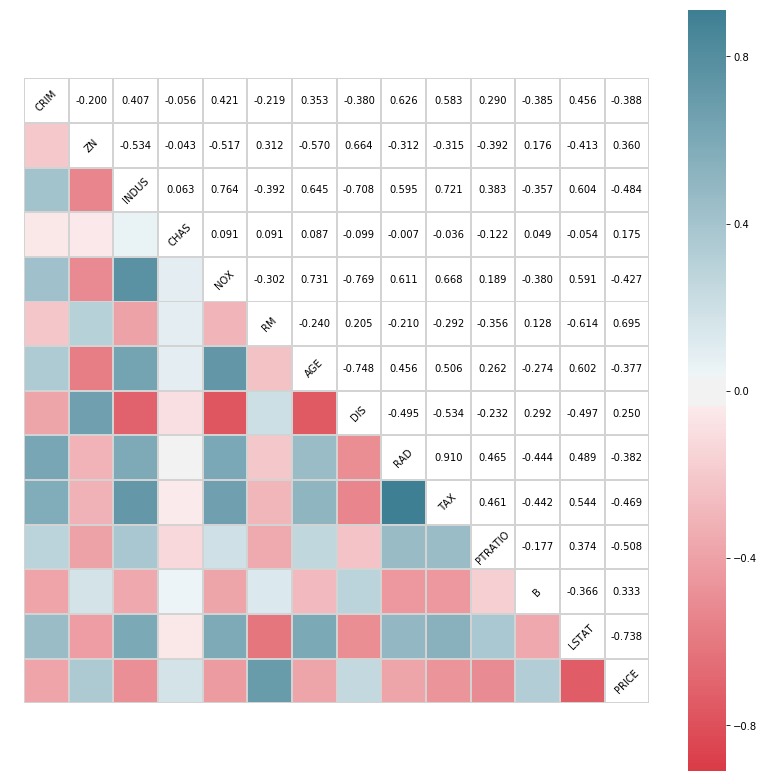

In [64]:
corrplot_(bos)

4- Train the model based on the train set. Use 75 peercent of the data for train part. Use 25 percent of the data for test part.



In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [84]:
bos["PRICE"].count()*.25

126.5

In [ ]:
# CREATE LINEAR REGRESSION FOR ONE INDEPENDENT VARIABLE AND "PRICE"

In [70]:
#Set feature cols
feature_cols = ["RM"]


X_train = bos[feature_cols][:380]
Y_train= bos.PRICE[:380]

In [74]:
print("Generating a Linuar Regression of 380 homes")
#2) obtain best linear representation from trained part of data
priceing_regression = LinearRegression()

priceing_regression.fit(X_train, Y_train)

Generating a Linuar Regression of 380 homes


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
#Coefficients are basically the weights of the factors
print("Printing the coefficient and y intercept of our trainging data")
print(priceing_regression.coef_)
print(priceing_regression.intercept_)

Printing the coefficient and y intercept of our trainging data
[9.22746282]
-33.766719404280046


In [122]:
#     3) Evaluate our model based mean square and R squared for test data
# Predict the botton 50 companies' sales
X_test = bos[feature_cols][-126:]
Y_test = bos.PRICE[-126::]
print("Predicting the sales of the bottom 50 companies (last ones)")
print(priceing_regression.predict(X_test).round(2))

#compute scores of sales regression model with this data:
print("Price Regressinon Score")
print(priceing_regression.score(X_test, Y_test).round(3))
print("Price Regressinon  R2Score")
print(r2_score(Y_test, priceing_regression.predict(X_test)).round(3))

Predicting the sales of the bottom 50 companies (last ones)
[30.53 26.63 17.32 17.17  6.54 14.93  9.16 12.37 11.26 15.97 18.95 22.07
 12.7  23.38 20.56 25.94 25.34 19.26 16.55 20.23 21.48 24.76 25.33 15.59
 17.27 18.67  4.42 17.98 18.06 29.46 19.36 27.66  8.94 13.8   7.93 25.6
 28.81 15.18 21.2  29.2  25.39 21.65 18.35 22.55 17.58 20.64 20.09 23.46
 23.38 25.1  24.81 29.28 25.52 25.62 23.52 27.4  25.85 23.   21.   18.16
 19.92 25.34 23.62 26.07 20.25 25.83 24.74 23.91 23.31 25.45 28.51 27.64
 24.34 34.45 28.32 26.44 21.38 21.01 24.38 22.35 28.07 25.07 24.52 26.33
 23.53 19.37 21.16 21.63 20.92 18.95 23.14 23.71 25.63 30.64 16.31 23.09
 26.06 15.18 23.31 23.71 23.83 28.52 31.39 19.4  20.41 24.48 22.65 20.72
 16.56 16.19 13.23 21.44 21.44 18.89 20.92 18.55 15.97 19.7  21.77 17.62
 21.85 27.07 22.71 30.6  28.92 21.87]
Price Regressinon Score
-1.931
Price Regressinon  R2Score
-1.931


In [140]:
#Set feature cols
def bos_price_regression(feature_cols, train_sample = .75):
    
    train_size = int((bos["PRICE"].count()*train_sample))
    test_size = bos["PRICE"].count() - train_size
    
    X_train = bos[feature_cols][:train_size]
    Y_train= bos.PRICE[:train_size]
    print("Generating a Linuar Regression of {} homes".format(train_size))
    #2) obtain best linear representation from trained part of data
    priceing_regression = LinearRegression()

    priceing_regression.fit(X_train, Y_train)
    #Coefficients are basically the weights of the factors
    print("Printing the coefficient and y intercept of our trainging data")
    print(priceing_regression.coef_)
    print(priceing_regression.intercept_)

    #     3) Evaluate our model based mean square and R squared for test data
    # Predict the botton 50 companies' sales
    X_test = bos[feature_cols][-126:]
    Y_test = bos.PRICE[-126:]
    print("Predicting the sales of the bottom {} companies (last ones)".format(test_size))
    print(priceing_regression.predict(X_test).round(2))

    #compute scores of sales regression model with this data:
    print("Price Regressinon Score")
    print(priceing_regression.score(X_test, Y_test).round(3))
    print("Price Regressinon  R2Score")
    print(r2_score(Y_test, priceing_regression.predict(X_test)).round(3))


In [250]:
def linear_predictor(features, train_size=0.75, df=bos, get_pred=True, get_acc=True, get_fit=True, get_err=True):
    """ Runs our linear regression for prediction on Boston housing data. """
    X, y = bos[features], bos["PRICE"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=1-train_size)
    
    model_LinReg = LinearRegression()
    model_LinReg.fit(X_train, y_train)

    y_pred = model_LinReg.predict(X_test)
    accuracy = model_LinReg.score(X_test, y_test)
    weights, intercept = model_LinReg.coef_, model_LinReg.intercept_
    RSq, MSE = r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)
    
    ret_params = {
        "y_pred": None,
        "accuracy": None,
        "weights": None,
        "intercept": None,
        "RSq": None,
        "MSE": None
    }
    if get_pred:
        ret_params["y_pred"] = y_pred
    if get_acc:
        ret_params["accuracy"] = accuracy
    if get_fit:
        ret_params["weights"] = weights
        ret_params["intercept"] = intercept
    if get_err:
        ret_params["RSq"] = RSq
        ret_params["MSE"] = MSE
    return ret_params

In [ ]:
one_feature = ["LSTAT"]
two_features = ["LSTAT", "RM"]
all_features = list(bos.keys())[0:13]

In [255]:
# Testing Predictor for One Independent Feature
params = linear_predictor(one_feature, get_acc=False, get_err=False)

y_pred = params["y_pred"]
accuracy = params["accuracy"]
weights = params["weights"]
intercept = params["intercept"]
RSq = params["RSq"]
MSE = params["MSE"]

In [270]:
# Testing Predictor for Two Independent Features
params = linear_predictor(two_features)

y_pred = params["y_pred"]
accuracy = params["accuracy"]
weights = params["weights"]
intercept = params["intercept"]
RSq = params["RSq"]
MSE = params["MSE"]

In [286]:
# Testing Predictor for Two Independent Features
params = linear_predictor(all_features)

y_pred = params["y_pred"]
accuracy = params["accuracy"]
weights = params["weights"]
intercept = params["intercept"]
RSq = params["RSq"]
MSE = params["MSE"]

In [287]:
RSq

0.6859697124479722

In [304]:
global_accuracy = 0

for iteration in range(100):
    params = linear_predictor(one_feature)
    global_accuracy += params["accuracy"]

print("For one feature (LSTAT), our model predicted with {:.2f}% accuracy.".format(global_accuracy))

For one feature (LSTAT), our model predicted with 53.96% accuracy.


In [305]:
global_accuracy = 0

for iteration in range(100):
    params = linear_predictor(two_features)
    global_accuracy += params["accuracy"]

print("For two features (LSTAT, RM), our model predicted with {:.2f}% accuracy.".format(global_accuracy))

For two features (LSTAT, RM), our model predicted with 63.69% accuracy.


In [306]:
global_accuracy = 0

for iteration in range(100):
    params = linear_predictor(all_features)
    global_accuracy += params["accuracy"]

print("For all features, our model predicted with {:.2f}% accuracy.".format(global_accuracy))

For all features, our model predicted with 71.10% accuracy.


In [141]:
feature_cols2 = ["RM", "DIS", "TAX"]

bos_price_regression(feature_cols2)

Generating a Linuar Regression of 379 homes
Printing the coefficient and y intercept of our trainging data
[ 9.33582670e+00 -2.91167066e-01  5.38919869e-04]
-33.33647311146498
Predicting the sales of the bottom 127 companies (last ones)
[31.66 27.68 18.25 18.11  7.38 15.87 10.03 13.26 12.12 16.84 19.8  22.88
 13.52 24.32 21.46 26.93 26.33 20.2  17.5  21.22 22.45 25.78 26.33 16.46
 18.19 19.66  5.31 19.   19.04 30.56 20.36 28.73  9.78 14.69  8.73 26.55
 29.81 16.06 22.11 30.21 26.33 22.55 19.18 23.41 18.38 21.51 20.93 24.38
 24.28 26.01 25.69 30.21 26.36 26.43 24.33 28.29 26.76 23.9  21.9  19.03
 20.79 26.23 24.5  26.99 21.12 26.74 25.62 24.74 24.11 26.29 29.35 28.47
 25.12 35.33 29.11 27.23 22.06 21.63 25.04 23.   28.83 25.8  25.2  27.01
 24.13 19.89 21.75 22.33 21.5  19.54 23.71 24.27 26.27 31.45 16.98 23.91
 26.88 15.93 24.13 24.61 24.3  29.07 31.95 19.62 20.75 24.79 23.07 21.23
 17.43 17.08 14.06 22.36 22.29 19.46 21.5  18.99 16.38 20.12 22.37 18.17
 22.41 27.64 23.28 31.31 29.54 22

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [143]:
bos_price_regression(feature_col_all)

Generating a Linuar Regression of 379 homes
Printing the coefficient and y intercept of our trainging data
[-1.62647151e-01  4.54534053e-02  6.81540605e-02  8.59133484e-01
 -1.55143801e+01  5.32160013e+00 -1.40134944e-03 -1.31116913e+00
  6.17381496e-01 -1.46527328e-02 -8.09280939e-01  2.75909911e-03
 -4.54810890e-01]
23.405978440853733
Predicting the sales of the bottom 127 companies (last ones)
[16.83 24.57 18.61 18.34  7.31 12.91  9.45  9.85 11.01 19.06 22.4  23.38
 14.37 25.87 22.94 26.51 25.68 21.68 10.47 17.35 17.08 23.69 24.63 16.77
 11.51 10.4  10.5  24.6  19.59 27.64 19.82 25.53  7.93 16.09  0.32 18.43
 22.96 12.77 10.72 23.94 26.   24.18 23.63 21.8  21.88 17.9  23.59 20.59
 22.41 21.75 26.09 27.42 29.24 25.37 23.39 22.13 23.02 17.49 13.44 18.46
 17.69 23.72 24.82 24.52 18.16 20.98 24.53 24.1  23.43 24.27 26.   26.51
 24.95 30.36 24.65 24.82 21.21 21.09 24.16 24.27 26.87 26.55 25.85 28.61
 26.06 23.73 22.63 23.27 22.21 23.23 26.05 28.63 28.68 32.53 21.26 22.89
 26.98 16.35 24.

In [144]:
# AFTER MODEL IS TRAINED AND TESTED

# weights, intercepts = model.coef_, model.intercept_
# y = weights * data + intercepts
# plt.plot(y)

In [ ]:
x